<a href="https://colab.research.google.com/github/CarlosSMWolff/Quantum-Optics-Course/blob/main/5-One-atom-laser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One-atom laser

Import necessary libraries

In [1]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qutip import *
import numpy as np
from numpy import sqrt
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors

In [3]:
ncav = 30

a = tensor(destroy(ncav),qeye(2))
sigma = tensor(qeye(ncav),destroy(2))

Lasing phase transition

In [4]:
r = 0.1
g = 1
Cmin = 0.00001
Cmax = 2
nC = 100
Cgrid = np.linspace(Cmin,Cmax,nC)

In [5]:
def rhoSS_coop(C):
  P=np.sqrt(4/(C*r))
  kappa = r*P
  H = g*(a*sigma.dag() + a.dag()*sigma)
  rhoss = steadystate(H, [sqrt(kappa)*a, sqrt(P)*sigma.dag()])
  return rhoss


In [6]:
rho_SS_C = [rhoSS_coop(C) for C in tqdm(Cgrid)]

100%|██████████| 100/100 [00:00<00:00, 141.84it/s]


In [7]:
cavity_pop_C = np.asarray([expect(a.dag()*a, rho) for rho in rho_SS_C])

In [8]:
cavity_pop_Anal = 1/(2*r)*(1-1/Cgrid)*np.heaviside(Cgrid-1,0.5)

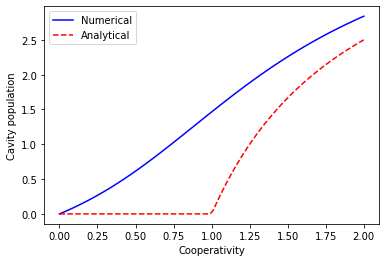

In [9]:
plt.plot(Cgrid,cavity_pop_C, 'b', label= 'Numerical')
plt.plot(Cgrid,cavity_pop_Anal, 'r--', label= 'Analytical')
plt.legend()
plt.ylabel('Cavity population')
plt.xlabel('Cooperativity')
plt.show()

With Qutip, we can make this expensive calculations quite fast, and also quickly explore other things, such as the field statistics across the phase transition, or the Wigner function.

In [10]:
g2_C = np.asarray([expect(a.dag()*a.dag()*a*a, rho)/expect(a.dag()*a, rho)**2 for rho in rho_SS_C])

We see the transition from thermal stastics to coherent: transition to lasing!!!

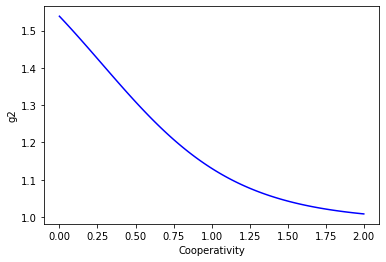

In [11]:
plt.plot(Cgrid,g2_C, 'b', label= 'Numerical')
plt.ylabel('g2')
plt.xlabel('Cooperativity')
plt.show()

In [12]:
rho_cav = rho_SS_C[-1].ptrace(0)

In [13]:
xmin = -2*np.sqrt(cavity_pop_C[-1])
xmax = -xmin
nx = 100
xgrid = np.linspace(xmin,xmax,nx)

In [14]:
Wigner = wigner(rho_cav, xgrid, xgrid, g=2)

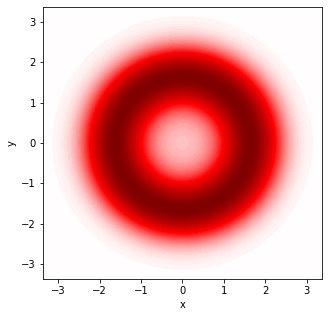

In [15]:
divnorm=colors.TwoSlopeNorm(vmin=-Wigner.max(), vcenter=0, vmax=Wigner.max())
1
#Plot the Wigner function
fig, ax = plt.subplots(figsize=(5,5))
ax.contourf(xgrid, xgrid, Wigner, 100, cmap="seismic", norm=divnorm)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Dissipative phase transitions and Liouvillian eigenvalues

In [16]:
C = 2
P=np.sqrt(4/(C*r))
kappa = r*P
H = g*(a*sigma.dag() + a.dag()*sigma)
L = liouvillian(H, [sqrt(kappa)*a, sqrt(P)*sigma.dag()])

In [ ]:
#alphas = L.eigenenergies(sort='low',eigvals=10)

In [17]:
Lnp = L.full()

In [ ]:
alphas = np.linalg.eigvals(Lnp)